In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score


In [3]:
df=pd.read_csv('cleaned_dataset.csv')
df.head(15)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,Female,United States,IL,Unknown,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,Male,United States,IN,Unknown,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,Male,Canada,CA,Unknown,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,Male,United Kingdom,CA,Unknown,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,Male,United States,TX,Unknown,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33.0,Male,United States,TN,Unknown,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35.0,Female,United States,MI,Unknown,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39.0,Male,Canada,CA,Unknown,No,No,Never,1-5,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42.0,Female,United States,IL,Unknown,Yes,Yes,Sometimes,100-500,No,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23.0,Male,Canada,CA,Unknown,No,No,Never,26-100,No,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [4]:
print(df.columns.tolist())

['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [5]:
features=['Age','benefits','family_history','seek_help','care_options','wellness_program','coworkers','anonymity', 'supervisor','leave','work_interfere','remote_work','obs_consequence']
num_features=['Age']
cat_features=['benefits','family_history','seek_help','care_options','wellness_program','coworkers', 'anonymity','supervisor','leave','work_interfere','remote_work','obs_consequence']
target='treatment'

In [6]:
df_copy=df[features+[target]].copy()

In [7]:
df_copy['treatment']=df_copy['treatment'].map({'No':0,'Yes':1})

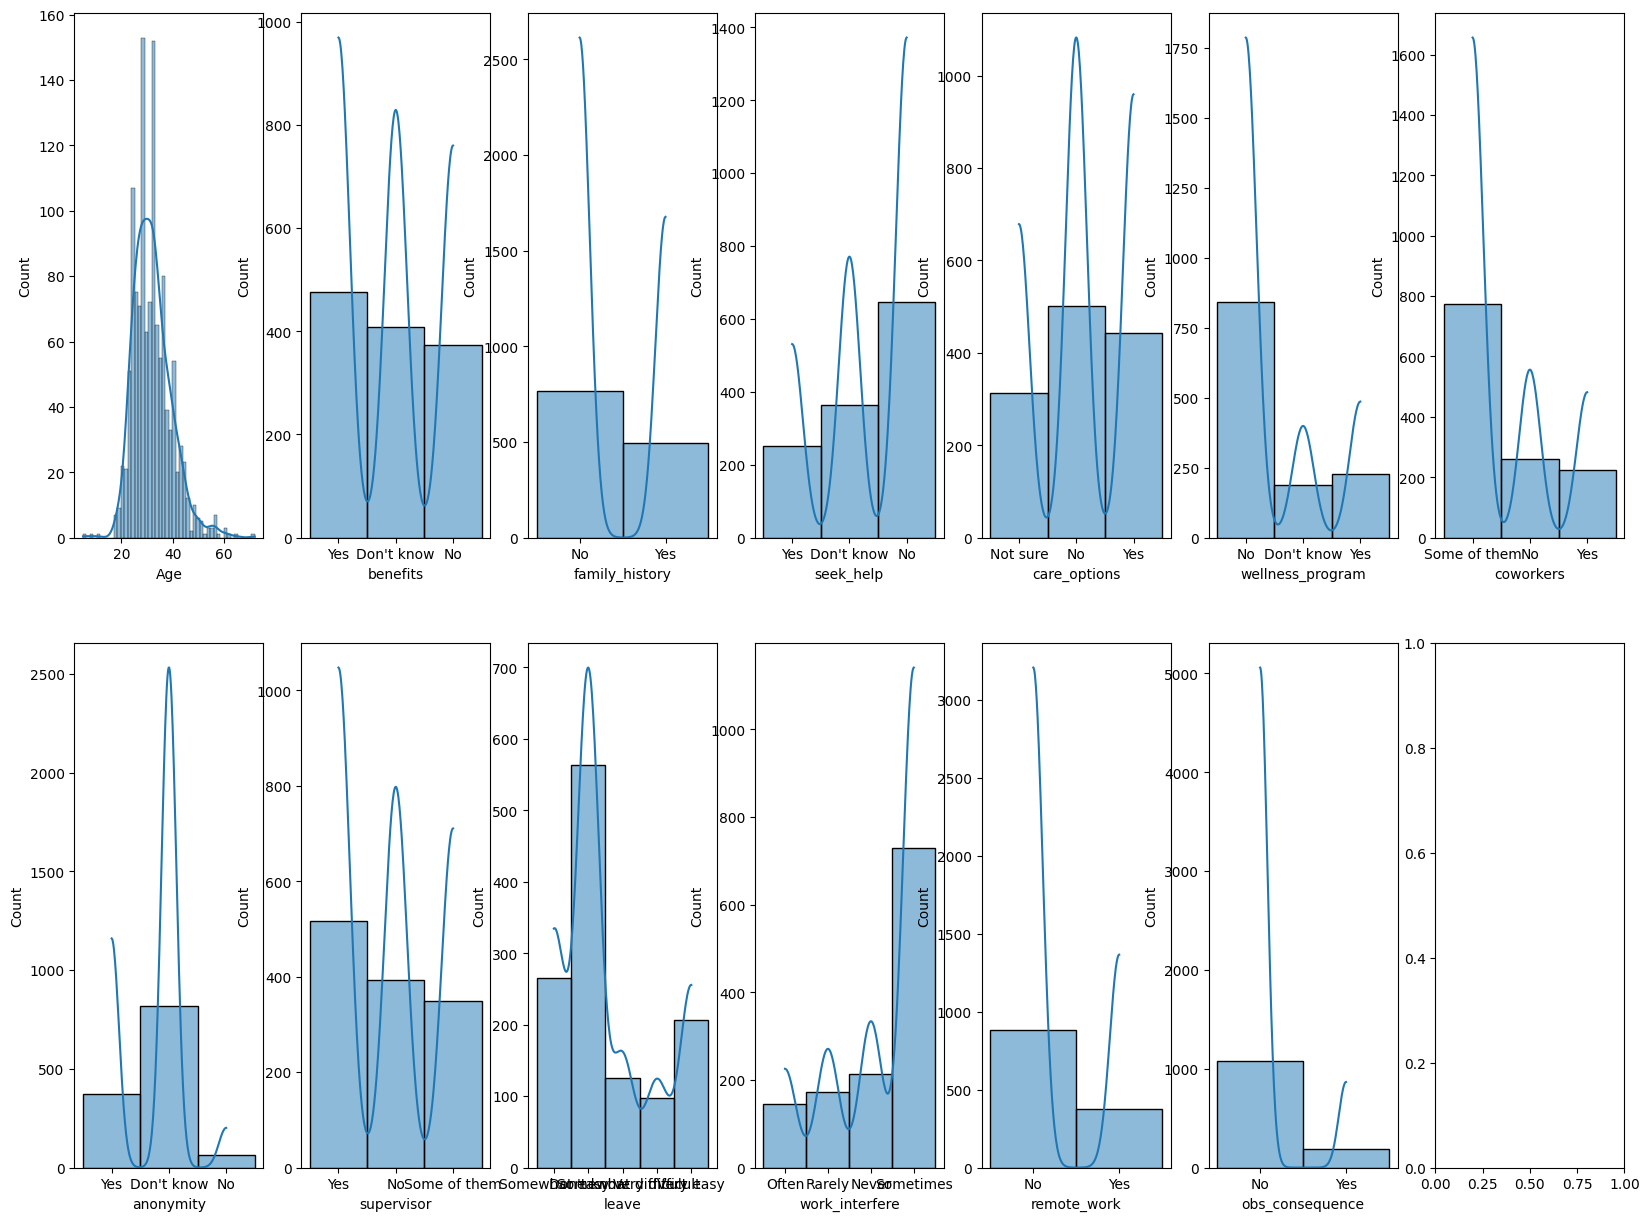

In [8]:
fig,axes=plt.subplots(2,7,figsize=(20,15))
axes=axes.flatten()
for i,feature in enumerate(features):
    sns.histplot(df[feature],bins=50,kde=True,ax=axes[i])
plt.show()

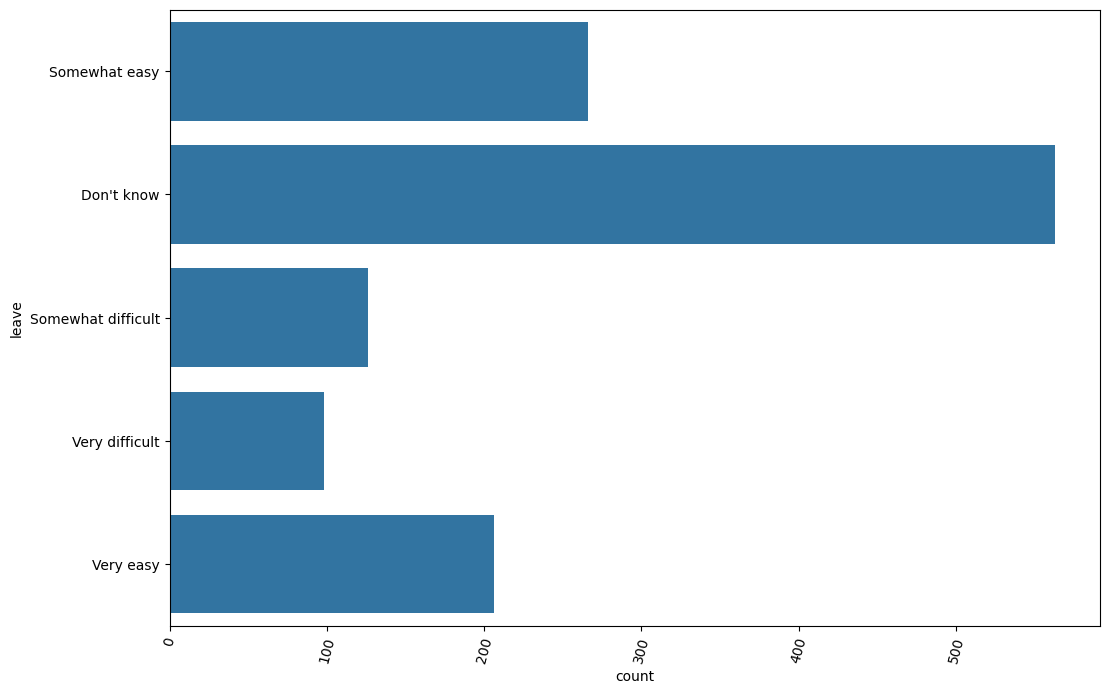

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(df['leave'])
plt.xticks(rotation=75)
plt.show()

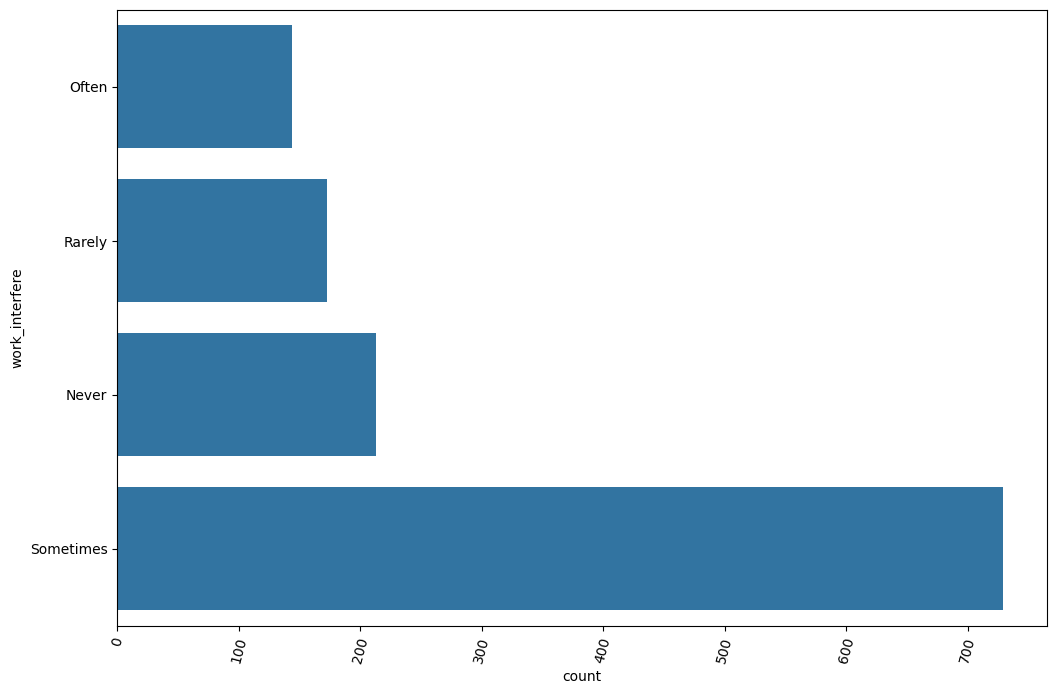

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df['work_interfere'])
plt.xticks(rotation=75)
plt.show()

In [11]:
X=df_copy[features]
y=df_copy[target]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [13]:
numerical_transformer=Pipeline([
    ('scale_numerical',StandardScaler())
])
numerical_transformer

Pipeline(steps=[('scale_numerical', StandardScaler())])

In [14]:
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
    ('scaler',StandardScaler())
])
categorical_transformer

Pipeline(steps=[('onehot',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False)),
                ('scaler', StandardScaler())])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num',numerical_transformer,num_features)
    ],
    remainder='passthrough' )
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['benefits', 'family_history', 'seek_help',
                                  'care_options', 'wellness_program',
                                  'coworkers', 'anonymity', 'supervisor',
                                  'leave', 'work_interfere', 'remote_work',
                                  'obs_consequence']),
                                ('num',
                                 Pipeline(steps=[('scale_numerical',
                                                  StandardScaler())]),
                                 ['Age'])])

In [16]:
X_train_encoded= preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

new_feature_names = preprocessor.get_feature_names_out()

print(X_train_encoded.shape)
print(X_test_encoded.shape)


(944, 25)
(315, 25)


In [17]:
rf_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ("model",RandomForestClassifier(random_state=42))
])
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['benefits', 'family_history',
                                                   'seek_help', 'care_options',
                                                   'wellness_program',
                                                   'coworkers', 'anonymity',
                                                   'supervisor', 'leave',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'obs_consequence']),
                                                 ('num',
                                                  Pipeline(steps=[('scale_numerical',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [18]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['benefits', 'family_history',
                                                   'seek_help', 'care_options',
                                                   'wellness_program',
                                                   'coworkers', 'anonymity',
                                                   'supervisor', 'leave',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'obs_consequence']),
                                                 ('num',
                                                  Pipeline(steps=[('scale_numerical',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [19]:
param_rf = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__max_depth": [None, 3, 5, 7, 10],
    "model__min_samples_split": [2, 3, 4]  # no None here
}

grid_rf = GridSearchCV(rf_pipeline, param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


In [20]:
y_pred_rf = best_rf.predict(X_test)


accuracy:0.7301587301587301
f1 score:0.7301587301587301
roc auc score:0.730166088849472


<Axes: >

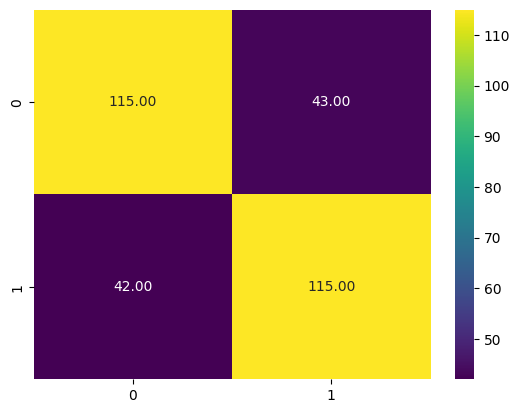

In [21]:
accuracy=accuracy_score(y_test,y_pred_rf)
f1=f1_score(y_test,y_pred_rf)
roc_auc=roc_auc_score(y_test,y_pred_rf)
print(f"accuracy:{accuracy}")
print(f"f1 score:{f1}")
print(f"roc auc score:{roc_auc}")
matrix=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(matrix,annot=True,fmt=".2f",cmap='viridis')

In [22]:
le_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ("model",LogisticRegression(random_state=42))
])
le_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['benefits', 'family_history',
                                                   'seek_help', 'care_options',
                                                   'wellness_program',
                                                   'coworkers', 'anonymity',
                                                   'supervisor', 'leave',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'obs_consequence']),
                                                 ('num',
                                                  Pipeline(steps=[('scale_numerical',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('model', LogisticRegression(random_state=42))])

In [23]:
param_le = [
    # Solvers that support only l2 or none
    {
        "model__solver": ["lbfgs", "newton-cg", "sag"],
        "model__penalty": ["l2", "none"],  # "none" must be a string, not None
        "model__C": [0.01, 0.1, 1, 10],
        "model__max_iter": [100, 200, 500, 1000]
    },
    # liblinear supports l1 and l2
    {
        "model__solver": ["liblinear"],
        "model__penalty": ["l1", "l2"],
        "model__C": [0.01, 0.1, 1, 10],
        "model__max_iter": [100, 200, 500, 1000]
    },
    # saga supports l1, l2, elasticnet, and none
    {
        "model__solver": ["saga"],
        "model__penalty": ["l1", "l2", "elasticnet", "none"],
        "model__C": [0.01, 0.1, 1, 10],
        "model__max_iter": [100, 200, 500, 1000]
        # If using elasticnet, you'd also need to set 'model__l1_ratio'
    }
]

grid_le = GridSearchCV(
    le_pipeline,
    param_grid=param_le,
    cv=5,
    scoring="accuracy",
    error_score=np.nan  # skip invalid ones just in case
)

grid_le.fit(X_train, y_train)
best_le = grid_le.best_estimator_


D:\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "D:\Lib\site-packages\sklearn\base.py", lin

In [24]:
y_pred_le=best_le.predict(X_test)

accuracy:0.7428571428571429
f1 score:0.7460815047021944
roc auc score:0.7429049423526567


<Axes: >

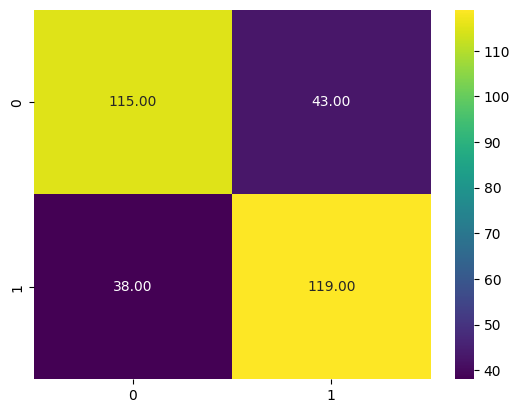

In [25]:
accuracy=accuracy_score(y_test,y_pred_le)
f1=f1_score(y_test,y_pred_le)
roc_auc=roc_auc_score(y_test,y_pred_le)
print(f"accuracy:{accuracy}")
print(f"f1 score:{f1}")
print(f"roc auc score:{roc_auc}")
matrix=confusion_matrix(y_test,y_pred_le)
sns.heatmap(matrix,annot=True,fmt=".2f",cmap='viridis')

In [26]:
param_xgb = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.1, 0.2],
    "model__subsample": [0.8, 1.0]
}

In [27]:
xgb_pipeline=Pipeline([
      ('preprocessor',preprocessor),
    ("model",XGBClassifier(
    use_label_encoder=False,  
    eval_metric='logloss',
    seed=42))
])

grid_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid=param_xgb,
    cv=5,
    scoring="accuracy",
)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_le.best_estimator_

best_xgb.fit(X_train, y_train)

D:\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Lib\site-packages\xgboost\training.py:183: UserWarning: [

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['benefits', 'family_history',
                                                   'seek_help', 'care_options',
                                                   'wellness_program',
                                                   'coworkers', 'anonymity',
                                                   'supervisor', 'leave',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'obs_consequence']),
                                                 ('num',
                                                  Pipeline(steps=[('scale_numerical',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('model',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))])

In [28]:
y_pred_xgb = best_xgb.predict(X_test)


accuracy:0.7428571428571429
f1 score:0.7460815047021944
roc auc score:0.7429049423526567


<Axes: >

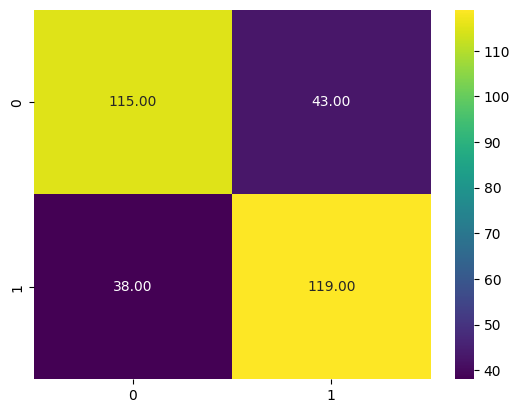

In [29]:
accuracy=accuracy_score(y_test,y_pred_xgb)
f1=f1_score(y_test,y_pred_xgb)
roc_auc=roc_auc_score(y_test,y_pred_xgb)
print(f"accuracy:{accuracy}")
print(f"f1 score:{f1}")
print(f"roc auc score:{roc_auc}")
matrix=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(matrix,annot=True,fmt=".2f",cmap='viridis')

In [30]:
svc_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ("model",SVC(random_state=42))
])
svc_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['benefits', 'family_history',
                                                   'seek_help', 'care_options',
                                                   'wellness_program',
                                                   'coworkers', 'anonymity',
                                                   'supervisor', 'leave',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'obs_consequence']),
                                                 ('num',
                                                  Pipeline(steps=[('scale_numerical',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('model', SVC(random_state=42))])

In [31]:
param_svc = [
    {   # Linear kernel (no gamma or degree)
        "model__kernel": ["linear"],
        "model__C": [0.1, 1, 10, 100]
    },
    {   # RBF kernel
        "model__kernel": ["rbf"],
        "model__C": [0.1, 1, 10, 100],
        "model__gamma": ["scale", "auto"]
    },
    {   # Polynomial kernel
        "model__kernel": ["poly"],
        "model__C": [0.1, 1, 10, 100],
        "model__gamma": ["scale", "auto"],
        "model__degree": [2, 3, 4]
    },
    {   # Sigmoid kernel
        "model__kernel": ["sigmoid"],
        "model__C": [0.1, 1, 10, 100],
        "model__gamma": ["scale", "auto"]
    }
]

In [32]:
grid_svc = GridSearchCV(
    svc_pipeline,
    param_grid=param_svc,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_svc.fit(X_train, y_train)
best_svm = grid_svc.best_estimator_


In [33]:
y_pred_svm = best_svm.predict(X_test)


accuracy:0.7365079365079366
f1 score:0.7365079365079366
roc auc score:0.7365153591872934


<Axes: >

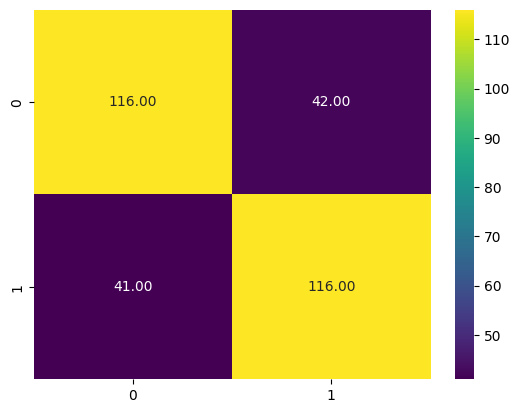

In [34]:
accuracy=accuracy_score(y_test,y_pred_svm)
f1=f1_score(y_test,y_pred_svm)
roc_auc=roc_auc_score(y_test,y_pred_svm)
print(f"accuracy:{accuracy}")
print(f"f1 score:{f1}")
print(f"roc auc score:{roc_auc}")
matrix=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(matrix,annot=True,fmt=".2f",cmap='viridis')

In [35]:
knn_pipeline = Pipeline([
    ('preprocessor',preprocessor), 
    ('model', KNeighborsClassifier())
])
knn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['benefits', 'family_history',
                                                   'seek_help', 'care_options',
                                                   'wellness_program',
                                                   'coworkers', 'anonymity',
                                                   'supervisor', 'leave',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'obs_consequence']),
                                                 ('num',
                                                  Pipeline(steps=[('scale_numerical',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('model', KNeighborsClassifier())])

In [36]:
param_knn = {
    'model__n_neighbors': [3, 5, 7, 9],       
    'model__weights': ['uniform', 'distance'], 
    'model__metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(
    knn_pipeline,
    param_grid=param_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_



In [37]:
best_knn.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['benefits', 'family_history',
                                                   'seek_help', 'care_options',
                                                   'wellness_program',
                                                   'coworkers', 'anonymity',
                                                   'supervisor', 'leave',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'obs_consequence']),
                                                 ('num',
                                                  Pipeline(steps=[('scale_numerical',
                                                                   StandardScaler())]),
                                                  ['Age'])])),
                ('model',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])

In [38]:
y_pred_knn = best_knn.predict(X_test)


accuracy:0.692063492063492
f1 score:0.6689419795221843
roc auc score:0.6918487462710634


<Axes: >

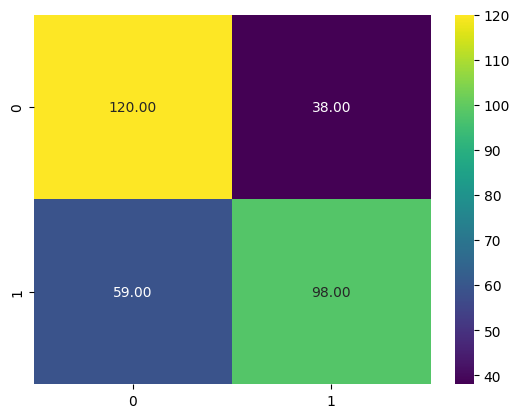

In [39]:
accuracy=accuracy_score(y_test,y_pred_knn)
f1=f1_score(y_test,y_pred_knn)
roc_auc=roc_auc_score(y_test,y_pred_knn)
print(f"accuracy:{accuracy}")
print(f"f1 score:{f1}")
print(f"roc auc score:{roc_auc}")
matrix=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(matrix,annot=True,fmt=".2f",cmap='viridis')

In [44]:
import joblib
joblib.dump(grid_xgb.best_estimator_, "classifier.pkl")

['classifier.pkl']